In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# **Lab 2:** Data Exploration and Model Training

### **Step 1:** Preparation and Authentication
Set the right parameters and authenticate your user.

In [1]:
project_id =  "" 
team_name  = "" 
location   = "us" #This is currently necessary
dataset_name = "datathon_ds_{}".format(team_name)

In [2]:
from google.cloud import bigquery
from google.cloud.bigquery import Client, QueryJobConfig

client = bigquery.Client(project=project_id)

### **Step 2:** Data Exploration
Get a feeling of the data and explore different facets and features

To remember: This is how the final training dataset looks like

| User Demographic Data | User Behavioral Data | Label
| --- | --- | --- |
| country | cnt_user_engagement | churned
| operating_system | cnt_level_start_quickplay |  |
| language | cnt_level_end_quickplay |  |
|  |  cnt_level_complete_quickplay |  |
|  |  cnt_level_reset_quickplay |  |
|  |  cnt_post_score |  |
|  |  cnt_spend_virtual_currency |  |
|  |  cnt_ad_reward |  |
|  |  cnt_challenge_a_friend |  |
|  |  cnt_completed_5_levels |  |
|  |  cnt_use_extra_steps |  |
|  |  user_first_engagement |  | **bold text**

In [3]:
query = f"""SELECT * FROM `{dataset_name}.cc_train_dataset`"""
job = client.query(query)
df = job.to_dataframe()
df.head()

,user_pseudo_id,country,operating_system,language,cnt_user_engagement,cnt_level_start_quickplay,cnt_level_end_quickplay,cnt_level_complete_quickplay,cnt_level_reset_quickplay,cnt_post_score,cnt_spend_virtual_currency,cnt_ad_reward,cnt_challenge_a_friend,cnt_completed_5_levels,cnt_use_extra_steps,user_first_engagement,churned
0,4F349267084BB476E7D496AA3422388B,United States,ANDROID,en-us,7,2,1,0,0,0,0,0,0,0,0,1529769862166004,0
1,F94E005EB49AFB8DA0A78030D4ABB44B,United States,ANDROID,en-us,8,4,2,2,1,2,0,0,0,0,0,1530299690915001,0
2,56C7AB443CB21553FF8690752E58BC79,United States,ANDROID,en-us,22,0,0,0,0,10,0,0,0,0,0,1533950048297006,1
3,D9A79CD45804EB82483DAB809D7B417C,Germany,ANDROID,de-de,7,2,1,1,0,1,1,0,0,0,1,1531053918021001,0
4,0CAAA1B6F161BA4D363EB7A2DEF64A08,United States,ANDROID,en-us,64,32,32,0,0,28,0,0,0,0,0,1529334029639003,0


In [4]:
df.describe(include='all')

,user_pseudo_id,country,operating_system,language,cnt_user_engagement,cnt_level_start_quickplay,cnt_level_end_quickplay,cnt_level_complete_quickplay,cnt_level_reset_quickplay,cnt_post_score,cnt_spend_virtual_currency,cnt_ad_reward,cnt_challenge_a_friend,cnt_completed_5_levels,cnt_use_extra_steps,user_first_engagement,churned
count,6386,6386,6183,6386,6386.000000,6386.000000,6386.000000,6386.000000,6386.000000,6386.000000,6386.000000,6386.000000,6386.000000,6386.000000,6386.000000,6.386000e+03,6386.000000
unique,6386,118,2,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4F349267084BB476E7D496AA3422388B,United States,IOS,en-us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3506,3152,3837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,30.538209,7.765581,4.938459,2.093642,1.941121,4.872847,0.447072,0.059192,0.018948,0.133104,0.401660,-1.356218e+15,0.234262
std,NaN,NaN,NaN,NaN,52.468331,26.602648,16.759185,10.233683,16.480642,14.401616,1.877727,0.675517,0.251139,0.363327,1.757354,2.995785e+12,0.423570
min,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.528787e+15,0.000000
25%,NaN,NaN,NaN,NaN,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.529774e+15,0.000000
50%,NaN,NaN,NaN,NaN,14.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.531470e+15,0.000000
75%,NaN,NaN,NaN,NaN,34.000000,7.000000,4.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.535155e+15,0.000000


<AxesSubplot:ylabel='operating_system'>

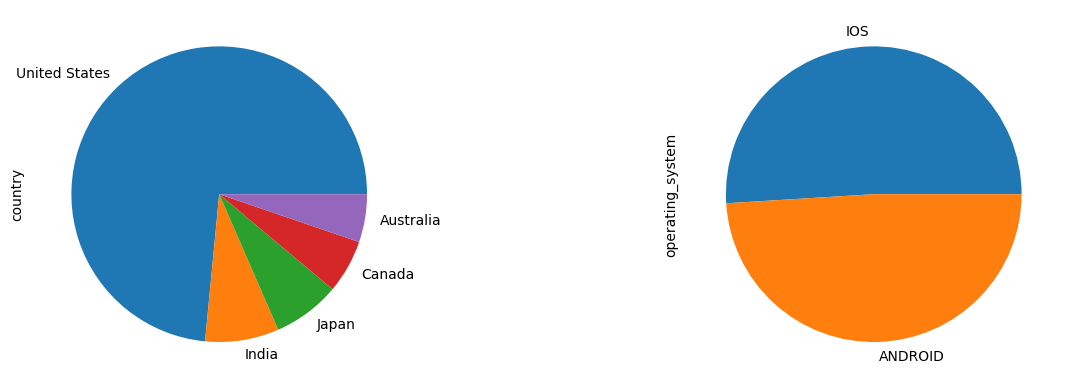

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(right=2.0)

# which country do users belong to?
df.country.value_counts(sort=True)[:5].plot(kind='pie',ax=axes[0])
# which operating system is widely used?
df.operating_system.value_counts().plot(kind='pie', ax=axes[1])

<AxesSubplot:ylabel='churned'>

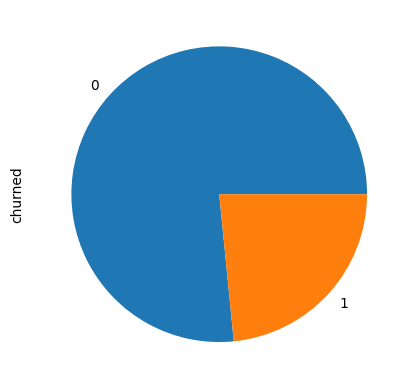

In [6]:
# How many users churned?
df.churned.value_counts().plot(kind='pie')

## **Step 3:** Train Propensity Churn Model

Which model should we use for our use case?
* List of classification [models](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-create-glm) in BQ to explore (Tip: Keep in mind the training time for more complex models ⏰)
  *  Logistic Regression
  *  Boosted Trees
  *  Deep Neural Networks
  *  Wide and Deep Networks
  *  AutoML tables

Feel free to switch the BQ UI to run your queries there.
Save your progress by saving your queries through the editor.





**Now it is your turn to train a model usign BQML !!**

In [ ]:
%%bigquery --project $project_id

CREATE MODEL `<model-name>`
OPTIONS(MODEL_TYPE='<type>',
        INPUT_LABEL_COLS = ['<label>'])
AS
SELECT * EXCEPT (user_pseudo_id)
FROM `<train-dataset>`

""


### **Feature Engineering**: How about we create new features from the user_first_engagement timestamp field?

Let's use the [TRANSFORM](https://cloud.google.com/bigquery-ml/docs/bigqueryml-transform) method in BigQuery ML to extract month, day of year, day of week and hour from the user_first_enagagement field.

Using the TRANSFORM clause, you can specify all preprocessing during model creation. The preprocessing is **automatically** applied during the prediction and evaluation phases of machine learning 😎

Hint: Use the [EXTRACT](https://cloud.google.com/bigquery/docs/reference/standard-sql/date_functions#extract) and [TIMESTAMP_MICROS](https://cloud.google.com/bigquery/docs/reference/standard-sql/timestamp_functions#timestamp_micros) functions

In [ ]:
%%bigquery --project $project_id
CREATE MODEL `<model-name>`

TRANSFORM(
  EXTRACT(<..>) as month,
  EXTRACT(<..>) as julianday,
  EXTRACT(<..>) as dayofweek,
  EXTRACT(<..>) as hour,
  * EXCEPT(user_first_engagement, user_pseudo_id)
)

OPTIONS(MODEL_TYPE='<model-type>',
        INPUT_LABEL_COLS = ['<label>'])
AS
SELECT *
FROM `<train-dataset>`

## Step 5: Evaluate Model

**Let**'s evaluate our model performance on the previously created evaluation view. Evaluation datasets are a useful way to tune your models accuracy before testing in production.

In [ ]:
%%bigquery --project $project_id
SELECT
  *
FROM
  ML.EVALUATE(MODEL `<model-name>`,
    (
    SELECT * EXCEPT(user_pseudo_id)
    FROM
      `<eval-dataset>`)
    )